In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

from skimage.feature import canny
from scipy import ndimage as ndi

In [51]:
# find files
files = [x for x in os.listdir(os.getcwd()) if x.endswith("JPG")]

# read the images
ims =[]

for i in files:
    ims.append(mpimg.imread(i))

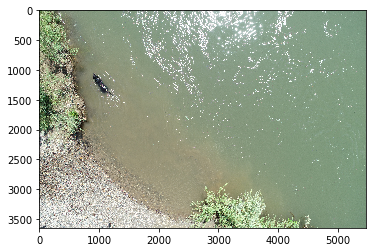

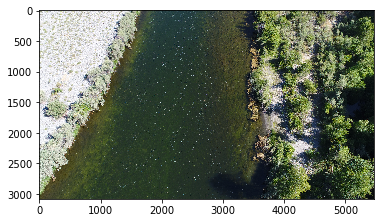

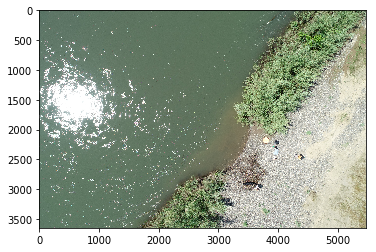

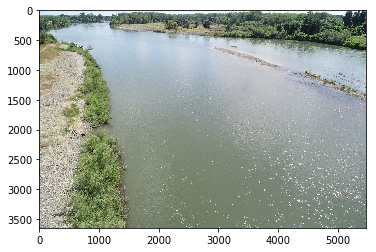

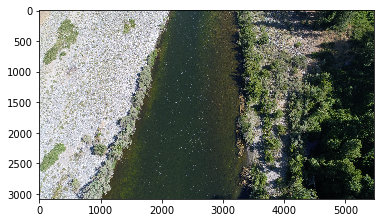

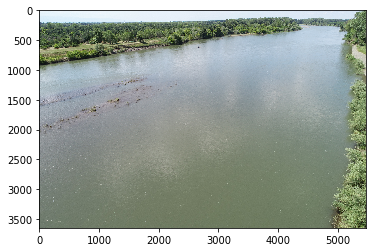

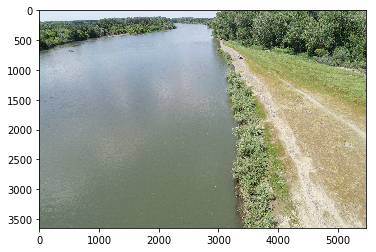

In [53]:
# plot ims
for i in ims:
    imgplot = plt.imshow(i)
    plt.show()

# Plot each band

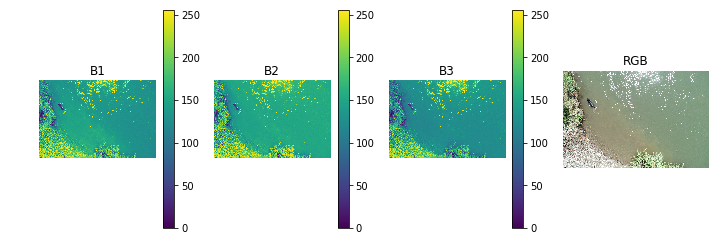

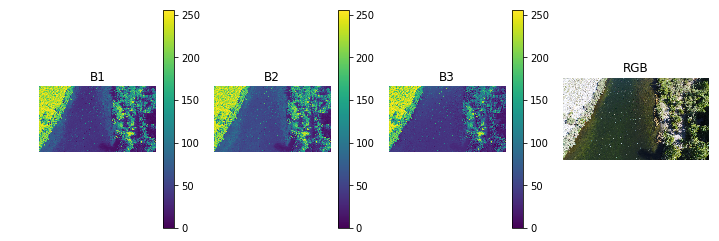

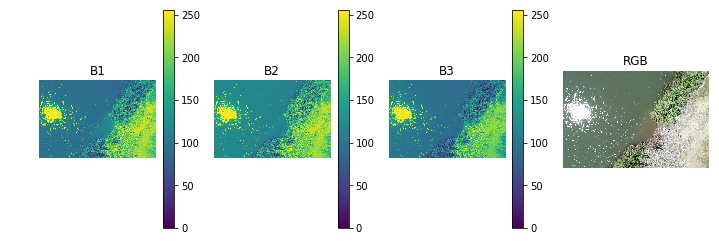

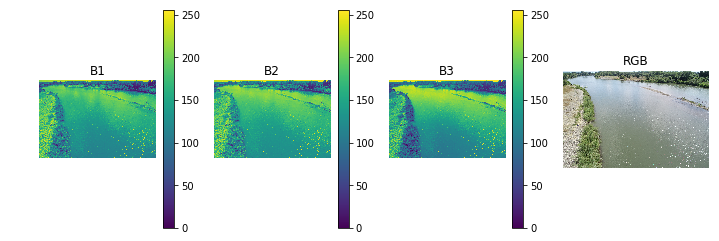

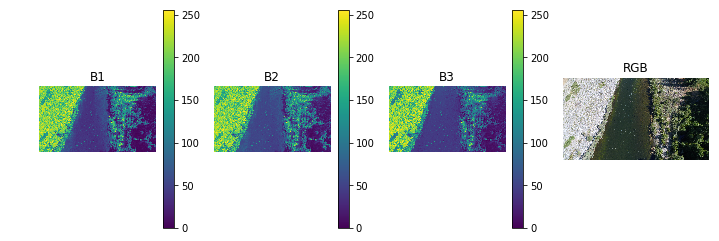

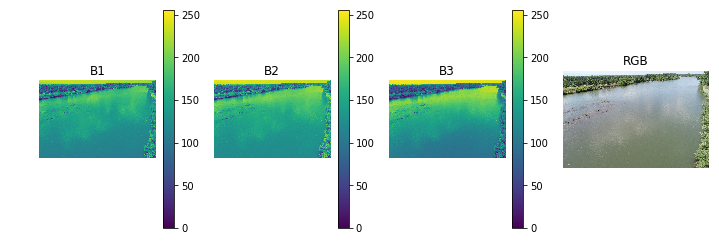

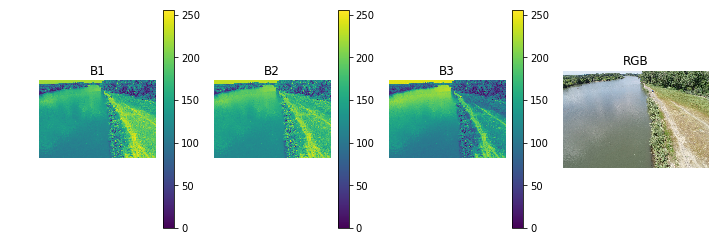

In [57]:
for i,x in enumerate(ims):
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,4,1)
    plt.title("B1")
    plt.imshow(ims[i][:,:,0])
    plt.axis("off")
    plt.colorbar()

    plt.subplot(1,4,2)
    plt.title("B2")
    plt.imshow(ims[i][:,:,1])
    plt.axis("off")
    plt.colorbar()

    plt.subplot(1,4,3)
    plt.title("B3")
    plt.imshow(ims[i][:,:,2])
    plt.axis("off")
    plt.colorbar()
    
    plt.subplot(1,4,4)
    plt.title("RGB")
    plt.imshow(ims[i][:,:,:])
    plt.axis("off")


In [58]:
def classify_water(im):
    e1 = ndi.binary_fill_holes(canny(im[:,:,0], sigma = 1))
    e2 = ndi.binary_fill_holes(canny(im[:,:,1], sigma = 1))
    e3 = ndi.binary_fill_holes(canny(im[:,:,2], sigma = 1))
    
    probs = e1.astype(int)+e2.astype(int)+e3.astype(int)
    
    return probs

In [60]:
classified = []

for i,x in enumerate(ims):
    classified.append(classify_water(x))

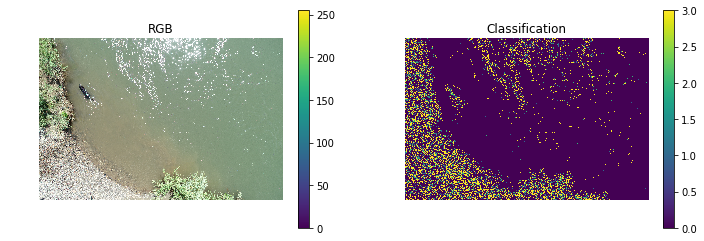

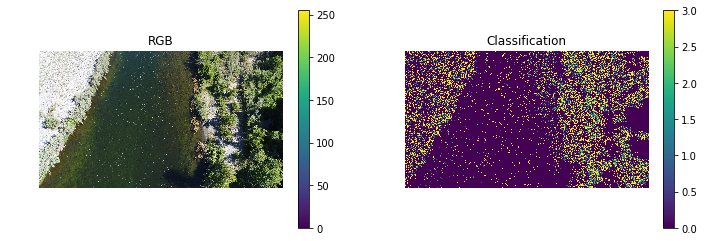

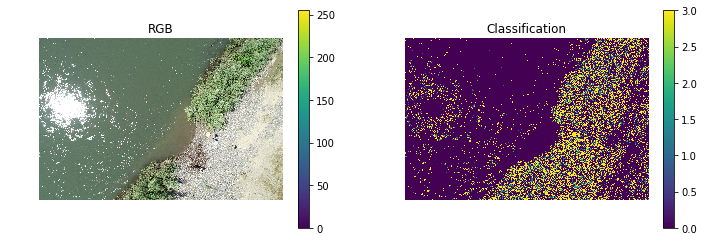

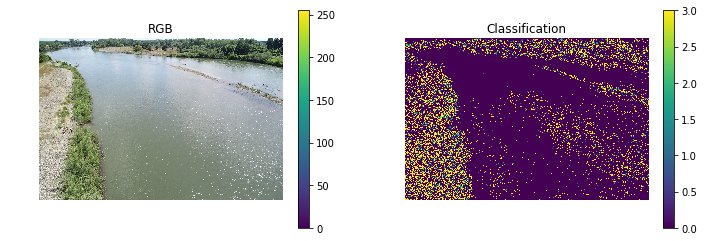

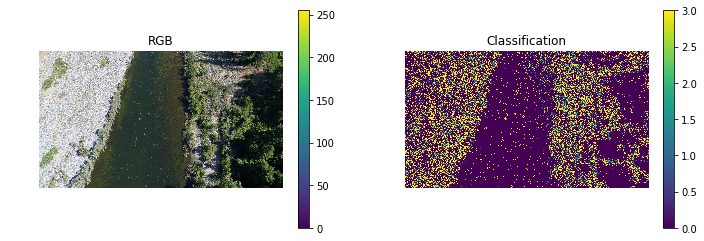

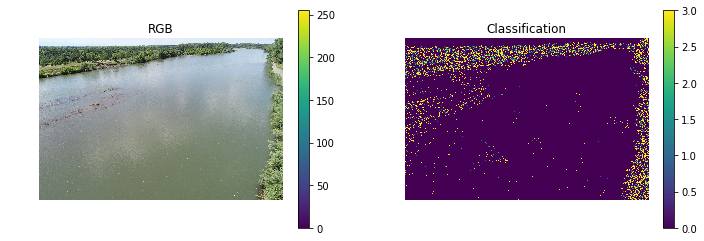

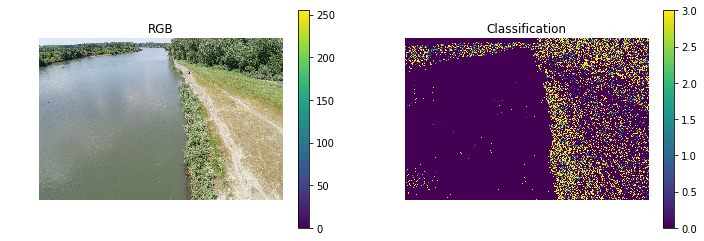

In [61]:
for i,x in enumerate(ims):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.title("RGB")
    plt.imshow(ims[i][:,:,:])
    plt.axis("off")
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.title("Classification")
    plt.imshow(classified[i])
    plt.axis("off")
    plt.colorbar()


In [ ]:
# TODO next: watershed segmentation. Use the 3 band probability